In [4]:
#IMPORTANT NOTEBOOK (BINARY SEGMENTATION)
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm #just for beautiful for loops
import random # !!!!!!!It is important to shuffle data inside
import pickle # for saving/loading data in/from binary files

#Constants
IMG_SIZE=50
FOLDERS_QUANTITY=1
FSTART=0
DATADIR="F:\BSU_FAMCS\BMI\CourseProject\Datasets\BreastCancer"
CATEGORIES=["Benign","Malignant"]


def creating_training_data():
    """Create dataset"""
    training_data=[]
    for folder in os.listdir(DATADIR)[FSTART:FOLDERS_QUANTITY]:
        path=os.path.join(DATADIR,folder)
        
        for category in CATEGORIES:
            class_num=CATEGORIES.index(category)
            current_path=os.path.join(path,str(class_num))
            
            for img in tqdm(os.listdir(current_path)):
                try:
                    img_array=cv2.imread(os.path.join(current_path,img),cv2.IMREAD_GRAYSCALE)
                    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                    training_data.append([new_array,class_num])
                except Exception as e:
                    pass #we don't care if some images weren't loaded
    #IMPORTANT
    random.shuffle(training_data)
    return  training_data


def separate_and_normalize(training_data):
    """Separates data list into X and Y.
    Besides it transforms into array
    and normalize X """
    X=[]
    Y=[]
    for array,category in training_data:
        X.append(array)
        Y.append(category)
    X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    X=X/255.0 
    Y=np.array(Y).reshape(-1,1)
    
    return X,Y


def pickling_out(X,name):
    """Saving X in binary file "name".pickle"""
    pickle_out=open("{}.pickle".format(name),"wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()
    
    
def pickling_in(name):
    """Loading X from binary file "name".pickle"""
    pickle_in=open("{}.pickle".format(name),"rb")
    X=pickle.load(pickle_in)
    pickle_in.close()
    return X
    
    
    

In [5]:
training_data=creating_training_data()

100%|██████████| 70/70 [00:00<00:00, 1325.82it/s]


In [6]:
len(training_data)

549

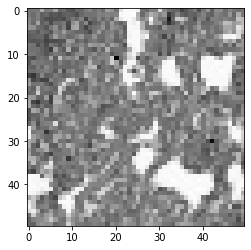

In [7]:
plt.imshow(training_data[1][0],cmap="gray")

In [8]:
for category in training_data[:10]:
    print(category[1])

0
0
0
0
0
0
0
0
1
1


In [9]:
#test_data=creating_training_data()
#len(test_data)

X,Y=separate_and_normalize(training_data)
pickling_out(X,"trainX")
pickling_out(Y,"trainY")